In [2]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import quandl

In [4]:
quandl.ApiConfig.api_key = "ms2ffZa4SRXqyryaKnyG"

In [5]:
df = quandl.get('EOD/AAPl')

In [6]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [7]:
df['Split'].value_counts()

1.0    1089
7.0       1
Name: Split, dtype: int64

In [9]:
df['Dividend'].value_counts()

0.00    1073
0.57       4
0.52       4
0.47       3
0.63       3
3.05       2
3.29       1
Name: Dividend, dtype: int64

# Feature Engineering

In [12]:
# 52week High / 52weel low
df['HL_PCT'] = (df['Adj_High'] - df['Adj_Low'])/ (df['Adj_Close']*100)

# Rate of increase
df['PCT_change'] = (df['Adj_Close'] - df['Adj_Open'])/ (df['Adj_Open']*100)

In [13]:
df.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,0.000271,-0.000092
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,0.000120,-0.000017
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,0.000142,-0.000100
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,0.000189,-0.000004
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.000088,0.000023


<AxesSubplot:>

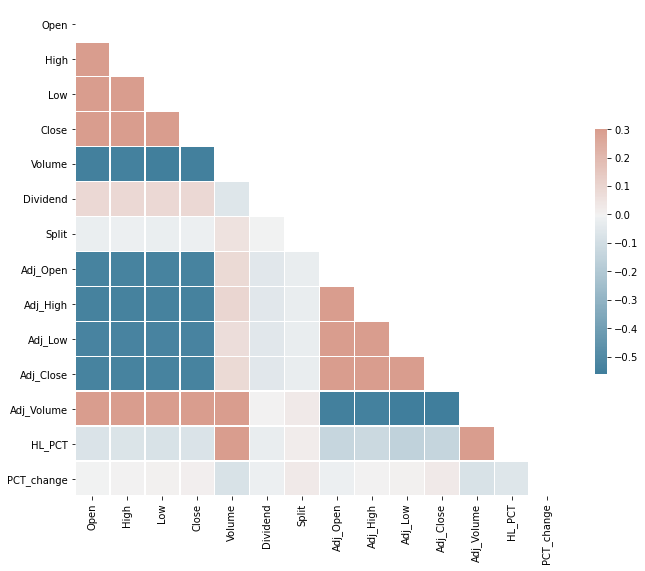

In [14]:
corr= df.corr()
mask= np.triu(np.ones_like(corr, dtype=bool))
cmap= sns.diverging_palette(230, 20, as_cmap=True)

fig, ax= plt.subplots(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

# Feature Selection

In [15]:
df1= df[['Adj_Close', 'Adj_Volume', 'HL_PCT', 'PCT_change']]
df1

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,
2013-09-03,15.476472,331928800.0,0.000271,-0.000092
2013-09-04,15.796753,345032800.0,0.000120,-0.000017
2013-09-05,15.688388,236367600.0,0.000142,-0.000100
2013-09-06,15.781833,359525600.0,0.000189,-0.000004
2013-09-09,16.033661,340687200.0,0.000088,0.000023
...,...,...,...,...
2017-12-21,42.101646,83799584.0,0.000110,0.000048
2017-12-22,42.101646,65397776.0,0.000053,0.000019
2017-12-26,41.033528,132742144.0,0.000105,-0.000013


<AxesSubplot:xlabel='Date'>

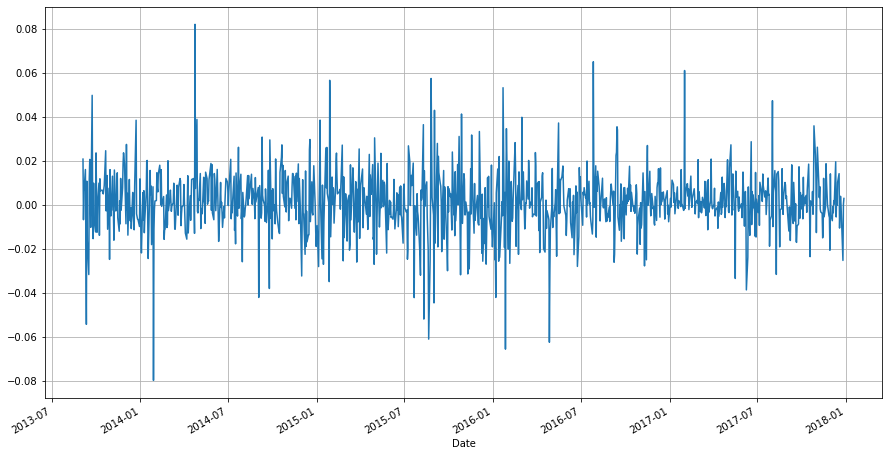

In [19]:
df1['Adj_Close'].pct_change().plot(figsize = (15,8),grid = True)

<AxesSubplot:title={'center':'Closing'}, xlabel='Dates', ylabel='Close Prices'>

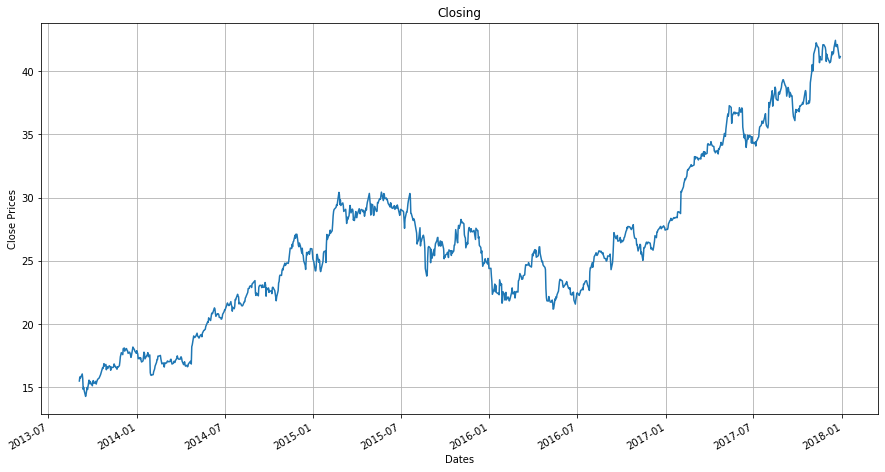

In [20]:
df1['Adj_Close'].plot(figsize=(15,8), grid=True, xlabel='Dates', ylabel='Close Prices', title='Closing')

In [21]:
df1.corr()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Close,1.000000,-0.553474,-0.137288,0.025237
Adj_Volume,-0.553474,1.000000,0.512480,-0.079556
HL_PCT,-0.137288,0.512480,1.000000,-0.060349
PCT_change,0.025237,-0.079556,-0.060349,1.000000


In [22]:
df1.isnull().sum()

Adj_Close     0
Adj_Volume    0
HL_PCT        0
PCT_change    0
dtype: int64

In [23]:
df1['Adj_Close']

Date
2013-09-03    15.476472
2013-09-04    15.796753
2013-09-05    15.688388
2013-09-06    15.781833
2013-09-09    16.033661
                ...    
2017-12-21    42.101646
2017-12-22    42.101646
2017-12-26    41.033528
2017-12-27    41.040745
2017-12-28    41.156217
Name: Adj_Close, Length: 1090, dtype: float64

In [26]:
label = df1['Adj_Close'].shift(-10)
label.tail(12)

Date
2017-12-12    41.040745
2017-12-13    41.156217
2017-12-14          NaN
2017-12-15          NaN
2017-12-18          NaN
2017-12-19          NaN
2017-12-20          NaN
2017-12-21          NaN
2017-12-22          NaN
2017-12-26          NaN
2017-12-27          NaN
2017-12-28          NaN
Name: Adj_Close, dtype: float64

In [27]:
label.dropna()

Date
2013-09-03    14.422914
2013-09-04    14.719406
2013-09-05    14.960780
2013-09-06    14.805882
2013-09-09    15.541726
                ...    
2017-12-07    42.101646
2017-12-08    42.101646
2017-12-11    41.033528
2017-12-12    41.040745
2017-12-13    41.156217
Name: Adj_Close, Length: 1080, dtype: float64

# Data preparation for model training

In [28]:
X= df[['Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Volume', 'HL_PCT', 'PCT_change']]

#X= df[['Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Volume']]

#X= df1[['Adj_Volume', 'HL_PCT', 'PCT_change']]
y= label.dropna()

In [29]:
print(X.shape)
print(y.shape)

print(type(X))
print(type(y))

(1090, 6)
(1080,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
X_lately= X[-10:]
X= X[:-10]

In [31]:
print(X.shape)
print(X_lately.shape)

(1080, 6)
(10, 6)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)
norm= MinMaxScaler().fit(X_train)

X_train= norm.transform(X_train)
X_test= norm.transform(X_test)
X_lately= norm.transform(X_lately)

# Model Evaluation

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)
print('train score: ', lin_reg.score(X_train, y_train))
print('test score: ', lin_reg.score(X_test, y_test))

train score:  0.9716928791606467
test score:  0.963337820462543


In [37]:
coef_df= pd.DataFrame(zip(X.columns, lin_reg.coef_), columns= ['features', 'estimated coefficients'])
coef_df

,features,estimated coefficients
0,Adj_Open,-10.265841
1,Adj_High,0.067372
2,Adj_Low,38.129795
3,Adj_Volume,-0.153062
4,HL_PCT,0.931940
5,PCT_change,0.561219


In [38]:
y_pred= lin_reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

forecast= lin_reg.predict(X_lately)
print('forecast\n', forecast)

MSE:  1.4586316194613114
forecast
 [41.78144154 41.9682596  42.75637457 42.32080317 42.12936533 42.51104362
 42.49831118 41.28931643 41.3409098  41.52448571]


In [ ]:
#X= df2[['Adj_Volume', 'HL_PCT', 'PCT_change']]
#MSE:  26.666838079762233

#X= df[['Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Volume']]
#MSE:  1.465427587363724


#X= df[['Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Volume', 'HL_PCT', 'PCT_change']]
#MSE:  1.4586316194613114